## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_mouse = combined_study_df["Mouse ID"].count()
total_mouse

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_study_df[combined_study_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse = combined_study_df[combined_study_df.duplicated(['Mouse ID',])]
all_duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df = combined_study_df.drop_duplicates(['Mouse ID', 'Timepoint'])
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mouse_total = new_df["Mouse ID"].count()
new_mouse_total

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table_drug = combined_study_df.groupby(['Drug Regimen'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_drug = summary_table_drug["Tumor Volume (mm3)"].mean()
median_drug = summary_table_drug["Tumor Volume (mm3)"].median()
variance_drug = summary_table_drug["Tumor Volume (mm3)"].var()
std_drug = summary_table_drug["Tumor Volume (mm3)"].std()
sem_drug = summary_table_drug["Tumor Volume (mm3)"].sem()

#rounding numbers
mean_drug = round(mean_drug,3)
median_drug = round(median_drug,3)
variance_drug = round(variance_drug,3)
std_drug = round(std_drug,3)
sem_drug = round(sem_drug,3)

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame ({"Mean" : mean_drug, 
                           "Median" : median_drug, 
                           "Variance" : variance_drug, 
                           "Standard Deviation" : std_drug, 
                           "SEM" : sem_drug})

#Print dataframe
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

In [8]:
#Create dataframe to have information
total_drug_df = pd.DataFrame(combined_study_df.groupby("Drug Regimen").count()['Mouse ID'])
total_drug_df

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


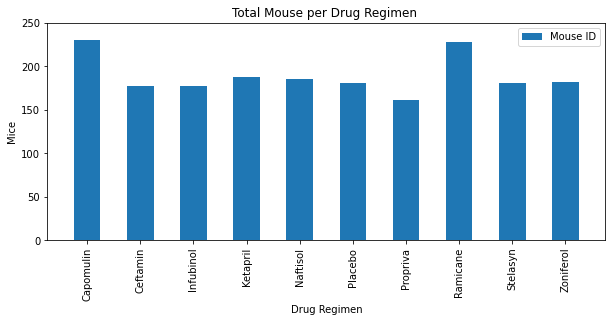

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#Create x_axis values
total_drug_df.plot(kind="bar", figsize=(10,4))

#Add title and labels
plt.title("Total Mouse per Drug Regimen ")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")

#set X and Y limits
plt.xlim(-0.75, len(total_drug_df)-0.25)
plt.ylim(0, 250)

#show graphic
plt.show()
plt.tight_layout()

(0.0, 250.0)

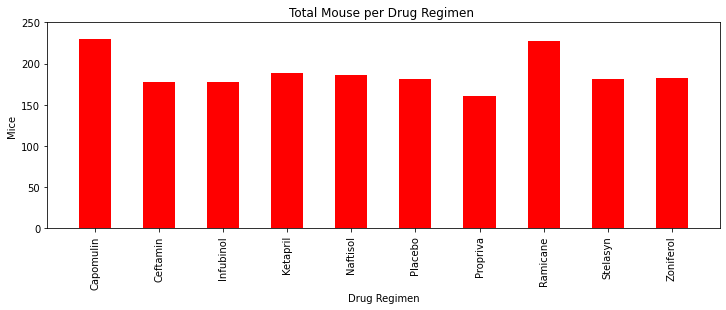

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(total_drug_df))
tick_locations = [value for value in x_axis]

#Create bar chart
plt.figure(figsize=(10,4))
plt.bar(x_axis, total_drug_df["Mouse ID"], color='r', width =0.5, align="center")
plt.xticks(tick_locations, total_drug_df.index.values, rotation="vertical") 
plt.tight_layout()

#Add title and labels
plt.title("Total Mouse per Drug Regimen ")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")

#set X and Y limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, 250)

In [11]:
#Create dataframe for gender

mouse_sex_df = pd.DataFrame(combined_study_df.groupby("Sex").count()['Mouse ID'])
mouse_sex_df


,Mouse ID
Sex,
Female,935
Male,958


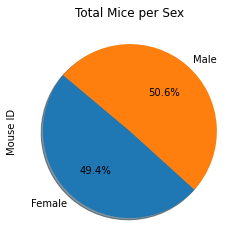

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = mouse_sex_df.index.values
mouse_sex_df.plot(kind="pie", y="Mouse ID", autopct="%1.1f%%", startangle = 140, shadow=True, labels= labels, legend=False)

#Add title
plt.title("Total Mice per Sex")

#show graphic
plt.show()
plt.tight_layout()

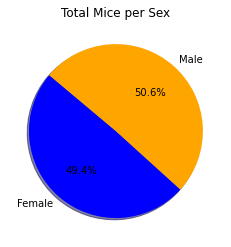

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Female", "Male"]
mouse = (combined_study_df.groupby("Sex").count()['Mouse ID']).tolist()
colors = ["blue","orange"]
explode = (0,0)

# Create pie chart
plt.pie(mouse, explode=explode, labels=gender, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Mice per Sex")

# Show graphic
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df1 = combined_study_df [combined_study_df["Drug Regimen"] == "Capomulin"]
ramicane_df1 = combined_study_df [combined_study_df["Drug Regimen"] == "Ramicane"]
infubinol_df1 = combined_study_df [combined_study_df["Drug Regimen"] == "Infubinol"]
ceftamin_df1 = combined_study_df [combined_study_df["Drug Regimen"] == "Ceftamin"]
drug_regimen_4 = pd.concat([capomulin_df1, ramicane_df1, infubinol_df1, ceftamin_df1])
treatment_tumor_df = drug_regimen_4.groupby("Mouse ID")


# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume_df = treatment_tumor_df.last()
final_tumor_volume_df

# This is not needed because I already have my own dataframe 


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a275,Ceftamin,Female,20,28,45,62.999356,3
a411,Ramicane,Male,3,22,45,38.407618,1
a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...
y769,Ceftamin,Female,6,27,45,68.594745,4
y793,Capomulin,Male,17,17,45,31.896238,2
y865,Ceftamin,Male,23,26,45,64.729837,3


In [15]:
new_df["Drug Regimen"].values

set(new_df["Drug Regimen"].values)

{'Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol'}

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = set(new_df["Drug Regimen"].values)

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = new_df.loc[new_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_list.append(tumor_volume)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    #print(f"The lower quartile of tumor volume is: {lowerq}")
    #print(f"The upper quartile of tumor volume is: {upperq}")
    #print(f"The interquartile tumor volume of drugs is: {iqr}")
    #print(f"The the median of tumor volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers for {drug}.")
    print(f"Values above {upper_bound} could be outliers for {drug}.")

Values below 28.77223060500001 could be outliers for Placebo.
Values above 78.60375672499998 could be outliers for Placebo.
Values below 32.81891142624998 could be outliers for Ceftamin.
Values above 71.19095325625001 could be outliers for Ceftamin.
Values below 26.714832162499995 could be outliers for Capomulin.
Values above 55.9711007025 could be outliers for Capomulin.
Values below 32.038901100000004 could be outliers for Stelasyn.
Values above 74.72753502 could be outliers for Stelasyn.
Values below 29.27604157 could be outliers for Ketapril.
Values above 79.82789683 could be outliers for Ketapril.
Values below 28.270133771250006 could be outliers for Naftisol.
Values above 78.97877414124999 could be outliers for Naftisol.
Values below 32.877792227499995 could be outliers for Propriva.
Values above 70.6598614075 could be outliers for Propriva.
Values below 24.1865864625 could be outliers for Ramicane.
Values above 57.488048122500004 could be outliers for Ramicane.
Values below 31.4

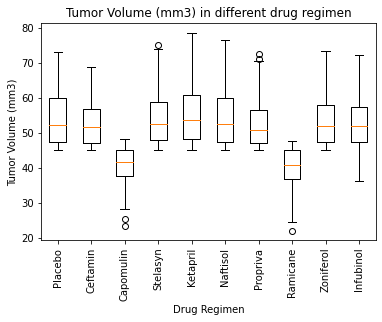

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#create graphic
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_volume_list)

# Create title and labels
ax1.set_title('Tumor Volume (mm3) in different drug regimen')
plt.xticks(ticks = range(1, len(drugs)+1), labels = drugs, rotation=90)
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')

#print graphic
plt.show()

## Line and Scatter Plots

In [18]:
#Create dataframe
capomulin_df = combined_study_df.loc[(combined_study_df["Drug Regimen"] == "Capomulin")]
capomulin_df
                            
#take 1 mouse
capomulin_onemouse_df = capomulin_df.loc[(combined_study_df["Mouse ID"] == "i557")]
capomulin_onemouse_df

#create dataframe for timepoint and tumor volume
capomulin_mouse_timepoint = capomulin_onemouse_df["Timepoint"]
capomulin_mouse_tumor = capomulin_onemouse_df["Tumor Volume (mm3)"]
#capomulin_mouse_timepoint
#capomulin_mouse_tumor


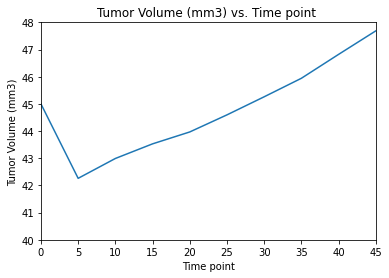

<Figure size 432x288 with 0 Axes>

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.plot(capomulin_mouse_timepoint, capomulin_mouse_tumor)

#Add title and labels
plt.title("Tumor Volume (mm3) vs. Time point ")
plt.xlabel("Time point")
plt.ylabel("Tumor Volume (mm3)")

#set X and Y limits
plt.xlim(0, 45)
plt.ylim(40, 48)

#show graphic
plt.show()
plt.tight_layout()

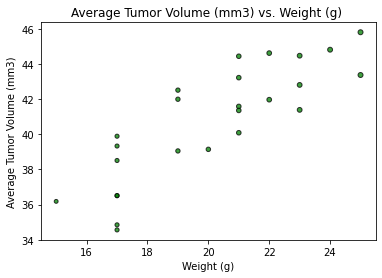

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Create dataframe
capomulin_df = combined_study_df.loc[(combined_study_df["Drug Regimen"] == "Capomulin")]

#calculate weight and tumor average
mouse_weight = capomulin_df.groupby(capomulin_df["Mouse ID"]).mean()["Weight (g)"]
tumor_volume = capomulin_df.groupby(capomulin_df["Mouse ID"]).mean()["Tumor Volume (mm3)"]
                    
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.scatter(mouse_weight, tumor_volume, marker="o", facecolors="green", edgecolors="black",
            s=mouse_weight, alpha=0.75)

#Add title and labels
plt.title("Average Tumor Volume (mm3) vs. Weight (g) ")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#show graphic
plt.show()

## Correlation and Regression

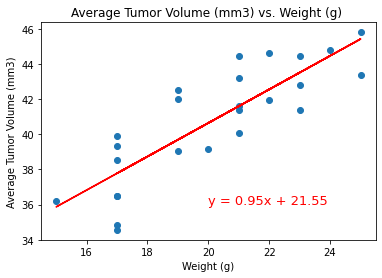

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = mouse_weight
y_values = tumor_volume

#calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=13,color="red")
plt.title("Average Tumor Volume (mm3) vs. Weight (g) ")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#print
plt.show()
